# 소규모 데이터셋에서 밑바탁부터 컨브넷 훈련하기

## 1. 새로운 데이터세트 만들기

In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

import tensorflow as tf
config = tf.compat.v1.ConfigProto(
gpu_options=tf.compat.v1.GPUOptions(
    per_process_gpu_memory_fraction=0.8
))
        
sess = tf.compat.v1.Session(config=config)

여기서 사용할 강아지와 고양이 데이터셋은 각각 12,500개의 이미지를 가지고 있다.<br/>
훈련 세트에는 1000개, 검증 세트에는 500개, 테스트 세트에는 500개의 샘플이 있도록 이 이미지들을 3개의 subset이 들어있는 새로운 데이터세트로 만들어보자.<br/>

In [2]:
import os, shutil

# 원본 데이터셋의 경로
original_dataset_dir = '/home/ksc/Keras_dataset/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉토리
base_dir = '/home/ksc/Keras_dataset/cats_and_dogs_small'
os.mkdir(base_dir)

# 이미지를 훈련, 검증, 테스트로 분할
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉토리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉토리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉토리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉토리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉토리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉토리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1000개의 고양이 이미지를 train_cats_dir에 복사한다.
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개의 고양이 이미지를 validation_cats_dir에 복사한다.
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개의 고양이 이미지를 test_cats_dir에 복사한다.
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1000개의 강아지 이미지를 train_cats_dir에 복사한다.
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개의 강아지 이미지를 validation_cats_dir에 복사한다.
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개의 강아지 이미지를 test_cats_dir에 복사한다.
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


## 2. 네트워크 구성하기

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

inputs = tf.keras.Input(shape=(150, 150, 3))
x = layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001))(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001))(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001))(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001))(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)      

In [4]:
# 모델의 훈련 설정

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

## 3. 데이터 전처리

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/ksc/Keras_dataset/cats_and_dogs_small/train'
validation_dir = '/home/ksc/Keras_dataset/cats_and_dogs_small/validation'
test_dir = '/home/ksc/Keras_dataset/cats_and_dogs_small/test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [7]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/50
100/100 [==============================] - 4s 37ms/step - loss: 0.7141 - acc: 0.5295 - val_loss: 0.7004 - val_acc: 0.5120
Epoch 2/50
100/100 [==============================] - 3s 33ms/step - loss: 0.6947 - acc: 0.5735 - val_loss: 0.7487 - val_acc: 0.5270
Epoch 3/50
100/100 [==============================] - 3s 32ms/step - loss: 0.6667 - acc: 0.6270 - val_loss: 0.6763 - val_acc: 0.5880
Epoch 4/50
100/100 [==============================] - 3s 31ms/step - loss: 0.6126 - acc: 0.6750 - val_loss: 0.6279 - val_acc: 0.6760
Epoch 5/50
100/100 [==============================] - 3s 32ms/step - loss: 0.5866 - acc: 0.7030 - val_loss: 0.6607 - val_acc: 0.6500
Epoch 6/50
100/100 [==============================] - 3s 33ms/step - loss: 0.5673 - acc: 0.7170 - val_loss: 0.6227 - val_acc: 0.6830
Epoch 7/50
100/100 [==============================] - 3s 33ms/step - loss: 0.5515 - acc: 0.7355 - val_loss: 0.6079 - val_acc: 0.6980
Epoch 8/50
100/100 [==============================] - 4s 36ms/step - 

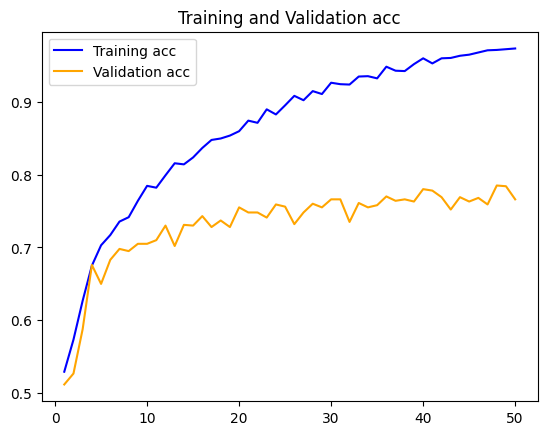

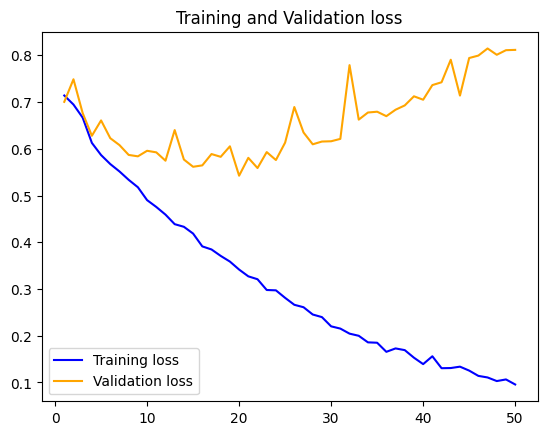

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

plt.plot(epoch, acc, 'b', label='Training acc')
plt.plot(epoch, val_acc, 'orange', label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()
plt.figure()

plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch, val_loss, 'orange', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

## 2.4 데이터 증식

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
inputs = tf.keras.Input(shape=(150, 150, 3))
x = layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001))(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001))(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001))(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001))(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)      

In [11]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['acc'])

In [12]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 8s 80ms/step - loss: 0.7544 - acc: 0.5140 - val_loss: 0.7015 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 8s 78ms/step - loss: 0.7020 - acc: 0.5260 - val_loss: 0.6915 - val_acc: 0.5390
Epoch 3/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6908 - acc: 0.5640 - val_loss: 0.6588 - val_acc: 0.6050
Epoch 4/100
100/100 [==============================] - 8s 77ms/step - loss: 0.6705 - acc: 0.6060 - val_loss: 1.2729 - val_acc: 0.5060
Epoch 5/100
100/100 [==============================] - 8s 76ms/step - loss: 0.6510 - acc: 0.6340 - val_loss: 0.6553 - val_acc: 0.5610
Epoch 6/100
100/100 [==============================] - 8s 77ms/step - loss: 0.6378 - acc: 0.6220 - val_loss: 0.6186 - val_acc: 0.6560
Epoch 7/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6372 - acc: 0.6425 - val_loss: 0.6215 - val_acc: 0.6560
Epoch 8/100
100/100 [==============================] - 8s 79ms

Epoch 62/100
100/100 [==============================] - 8s 77ms/step - loss: 0.4892 - acc: 0.7775 - val_loss: 0.4547 - val_acc: 0.8070
Epoch 63/100
100/100 [==============================] - 8s 76ms/step - loss: 0.4974 - acc: 0.7790 - val_loss: 0.5156 - val_acc: 0.7580
Epoch 64/100
100/100 [==============================] - 8s 76ms/step - loss: 0.4914 - acc: 0.7805 - val_loss: 0.4635 - val_acc: 0.7960
Epoch 65/100
100/100 [==============================] - 8s 77ms/step - loss: 0.4698 - acc: 0.7865 - val_loss: 0.4702 - val_acc: 0.7980
Epoch 66/100
100/100 [==============================] - 8s 77ms/step - loss: 0.4991 - acc: 0.7875 - val_loss: 0.5111 - val_acc: 0.7720
Epoch 67/100
100/100 [==============================] - 8s 76ms/step - loss: 0.4894 - acc: 0.7885 - val_loss: 0.4629 - val_acc: 0.7830
Epoch 68/100
100/100 [==============================] - 8s 76ms/step - loss: 0.4910 - acc: 0.7820 - val_loss: 0.4793 - val_acc: 0.8030
Epoch 69/100
100/100 [==============================] -

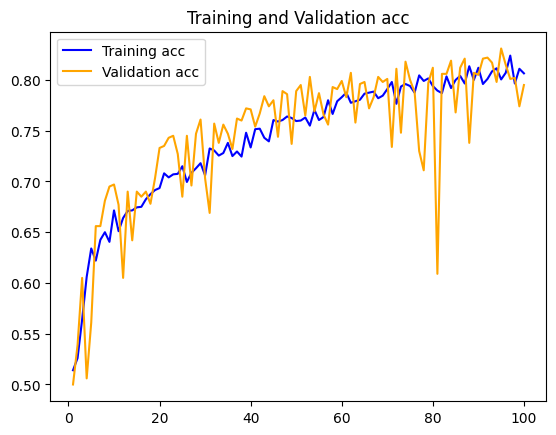

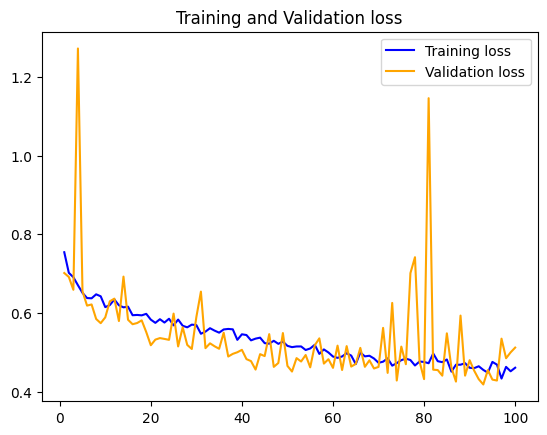

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

plt.plot(epoch, acc, 'blue', label='Training acc')
plt.plot(epoch, val_acc, 'orange', label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()
plt.figure()

plt.plot(epoch, loss, 'blue', label='Training loss')
plt.plot(epoch, val_loss, 'orange', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()